Name : Rajwardhan Sujit Dhumal <br>Class : TY-IT CORE<br>Batch : CORE 2<br>Enrollment No. MITU22BTIT0063

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

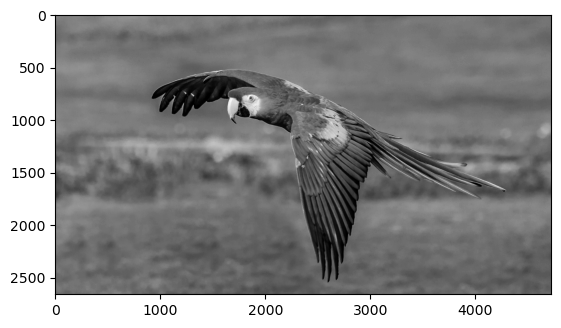

In [3]:
img=cv2.imread("bird.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
def rajwardhan_GF(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v
    return G

In [7]:
GF = rajwardhan_GF(11,5/3)

In [8]:
np.sum(GF)

0.9983806602967675

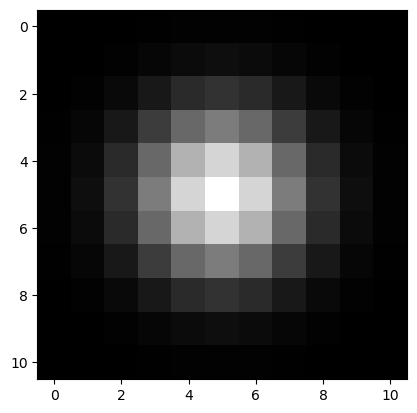

In [9]:
plt.imshow(GF*255,cmap="gray")

## Gaussian Filter

In [10]:
from scipy import signal

In [11]:
imBlurred = signal.convolve2d(img,GF, boundary = 'symm',mode = 'same')

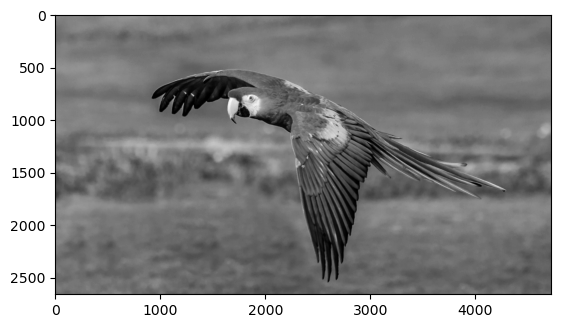

In [12]:
plt.imshow(imBlurred,cmap="gray")

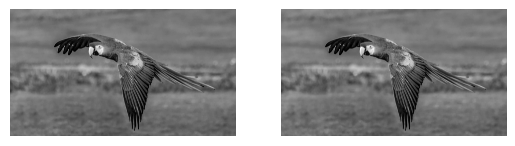

In [13]:
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(imBlurred,cmap='gray')
plt.axis('off')
plt.show()

### Gradient at x

In [14]:
x=np.zeros((2,1))
x[0]=-1
x[1]=1
x

array([[-1.],
       [ 1.]])

### Gradient at y

In [15]:
y=np.zeros((1,2))
y[0][0]=-1
y[0][1]=1
y

array([[-1.,  1.]])

In [16]:
Ix=signal.convolve2d(imBlurred,x, boundary = 'symm',mode = 'same')
Iy=signal.convolve2d(imBlurred,y, boundary = 'symm',mode = 'same')

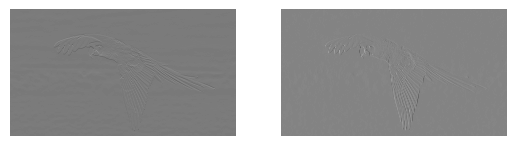

In [17]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.axis('off')
plt.show()

## Intensity gradient and Edge Detection

In [18]:
IG = (Ix**2 + Iy**2)**0.5
ED =np.rad2deg(np.arctan2(Iy,Ix))

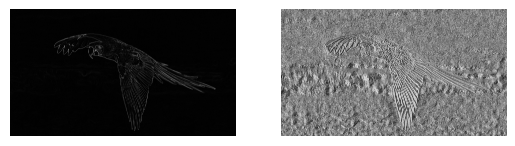

In [19]:
plt.subplot(121)
plt.imshow(IG,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(ED,cmap='gray')
plt.axis('off')
plt.show()

In [20]:
ED

array([[  0.        ,  90.        ,  90.        , ...,  90.        ,
         90.        ,  90.        ],
       [180.        , 117.28120698, 113.07863814, ...,  94.21728321,
        103.61522865, 117.14785525],
       [180.        , 132.67696906, 129.100619  , ...,  82.06401367,
        105.34564487, 127.5771245 ],
       ...,
       [  0.        , -18.92571123, -38.11218712, ..., 128.95086896,
        122.65536789, 130.48739821],
       [  0.        , -24.75749352, -48.04606987, ..., 121.03493792,
        114.640626  , 120.07118521],
       [  0.        , -41.20293109, -64.37979221, ..., 106.16377125,
        101.22587766, 102.22329947]])

## Non Maxima Suppression

In [22]:
def rajwardhan_NMS(Gm,Gd):
    Gd_bin = 45*(np.round(Gd/45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows,numCols = Gm.shape[0],Gm.shape[1]
    a,b=0.,0.
    for r in range(1,numRows-1):
        for c in range(1,numCols-1):
            ang = Gd_bin[r,c]
            if ang == 180. or ang == -180. or ang == 0.0 or ang == -0.0:
                a,b = Gm[r-1,c], Gm[r+1,c]
            elif ang == 45. or ang == -135.:
                a,b = Gm[r+1,c+1],Gm[r-1,c-1]
            elif ang == 90. or ang == -90.:
                a,b = Gm[r,c-1],Gm[r,c+1]
            elif ang == 135. or ang == -45.:
                a,b = Gm[r-1,c+1],Gm[r+1,c-1]
            else:
                print('Error')
                return
            if Gm[r,c] >= a and Gm[r,c] >= b:
                Gm_NMS[r,c] = Gm[r,c]
    return Gm_NMS

In [23]:
imgNMS = rajwardhan_NMS(IG,ED)

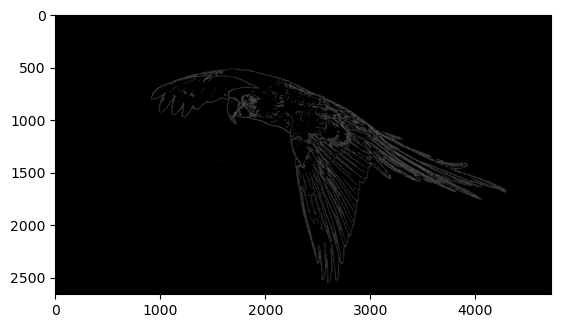

In [24]:
plt.imshow(imgNMS>5,cmap='gray')

## Hesterysis Thresholding

In [25]:
from skimage import filters

In [26]:
L = imgNMS.mean()
H = L + imgNMS.std()
E = filters.apply_hysteresis_threshold(imgNMS,L,H)

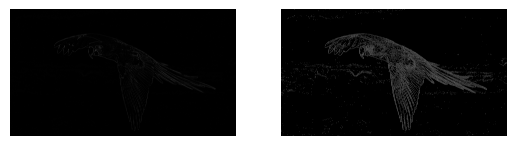

In [27]:
plt.subplot(121)
plt.imshow(imgNMS,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(E,cmap='gray')
plt.axis('off')
plt.show()

In [28]:
imgNMS

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.67537889,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.48515699,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.3467194 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.44800202, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

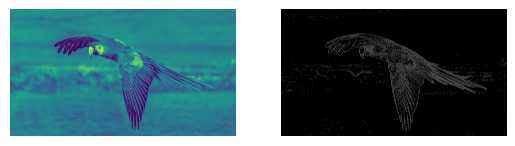

In [29]:
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(E,cmap='gray')
plt.axis('off')
plt.show()